In [ ]:
#Import Python Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#reading features list from ‘kddcup.names’ file
with open(r"/content/drive/MyDrive/kddcup.names") as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [ ]:
# Appending columns to the dataset and adding a 
#new column name ‘target’ to the dataset
cols="""duration, protocol_type, service, flag, src_bytes, dst_bytes, land, wrong_fragment, urgent, hot,
num_failed_logins, logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,
num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,
rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,
dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,
dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
#print(columns)
print(len(columns))

42


In [ ]:
#Reading the ‘attack_types’ file.
with open(r"/content/drive/MyDrive/training_attack_types") as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [ ]:
#Creating a dictionary of attack_types
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

In [ ]:
#Reading the dataset(‘kddcup.data_10_percent.gz’) and 
df = pd.read_csv(r"/content/drive/MyDrive/kddcup.data_10_percent.gz", names=columns)


In [ ]:
#adding Attack Type feature in the training dataset where attack type
#feature has 5 distinct values i.e. dos, normal, probe, r2l, u2r.
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

In [ ]:
#viewing the first five rows of the data
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [ ]:
#Shape of dataframe
df.shape

(494021, 43)

In [ ]:
#ssummary of the data
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Number of labels in the target column
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

Text(0.5, 1.0, 'Target label counts')

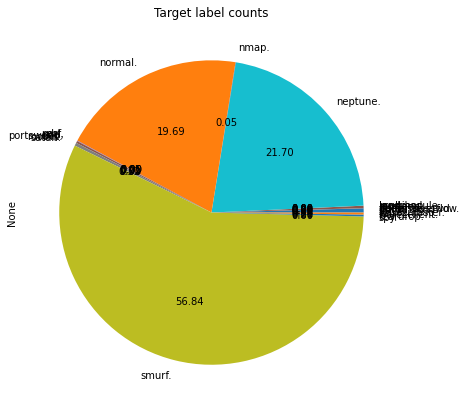

In [ ]:
plt.figure(figsize=(20, 7))
df.groupby('target').size().plot(kind='pie', autopct='%.2f')
plt.title('Target label counts')

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

Text(0.5, 1.0, 'Attack type label counts')

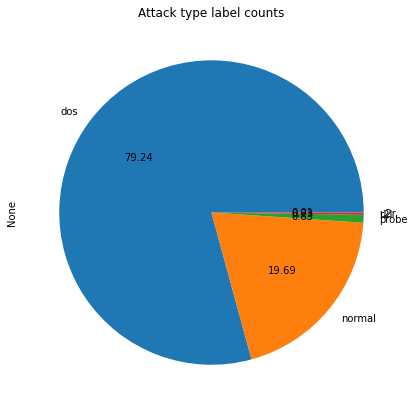

In [ ]:
plt.figure(figsize=(25, 7))
df.groupby('Attack Type').size().plot(kind='pie', autopct='%.2f')
plt.title('Attack type label counts')

In [ ]:
# getting data type of each feature
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [ ]:
# Finding missing values of all features.
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
#Finding Categorical Features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['service', 'protocol_type', 'flag']

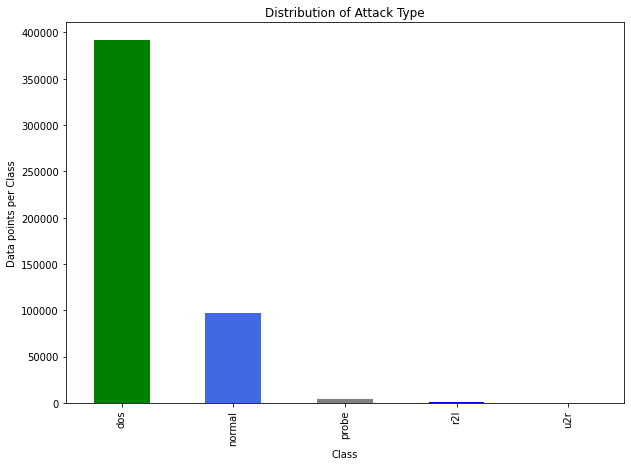

In [ ]:
# Exploratory data analysis
plt.figure(figsize=(10,7))
class_distribution = df['Attack Type'].value_counts()
c = ['green', 'royalblue', 'grey', 'blue', 'orange']
class_distribution.plot(kind='bar',color = c)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Attack Type')
plt.show()

In [ ]:
#Visualizing Categorical Features using bar graph
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar", color = c)

Text(0.5, 1.0, 'Distribution of protocol type')

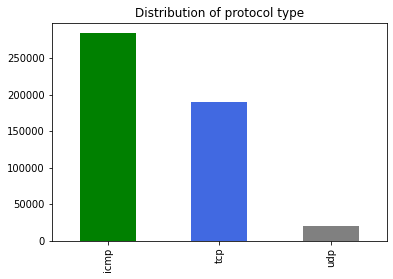

In [ ]:
bar_graph('protocol_type')
plt.title("Distribution of protocol type")


Text(0.5, 1.0, 'Distribution of service')

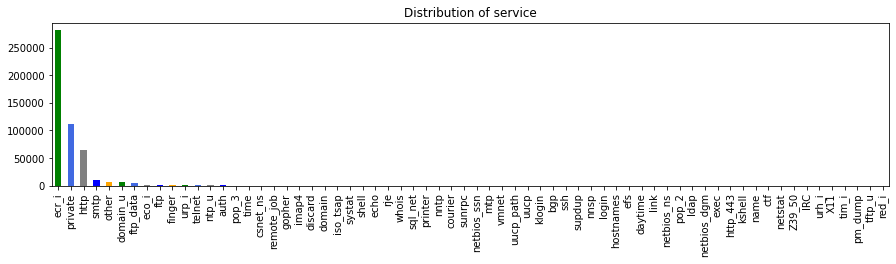

In [ ]:
plt.figure(figsize=(15,3))
bar_graph('service')
plt.title("Distribution of service")

Text(0.5, 1.0, 'Distribution of flag')

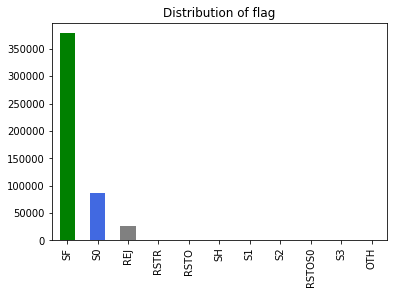

In [ ]:
bar_graph('flag')
plt.title("Distribution of flag")

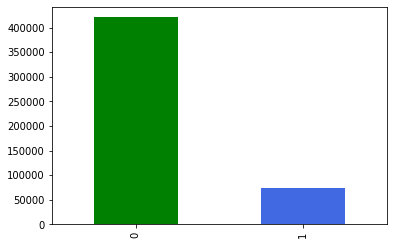

In [ ]:
bar_graph('logged_in')

Text(0.5, 1.0, 'Distribution of target')

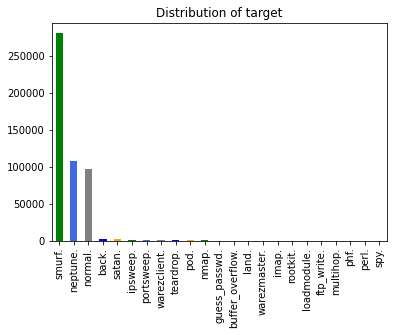

In [ ]:
bar_graph('target')
plt.title("Distribution of target")

In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

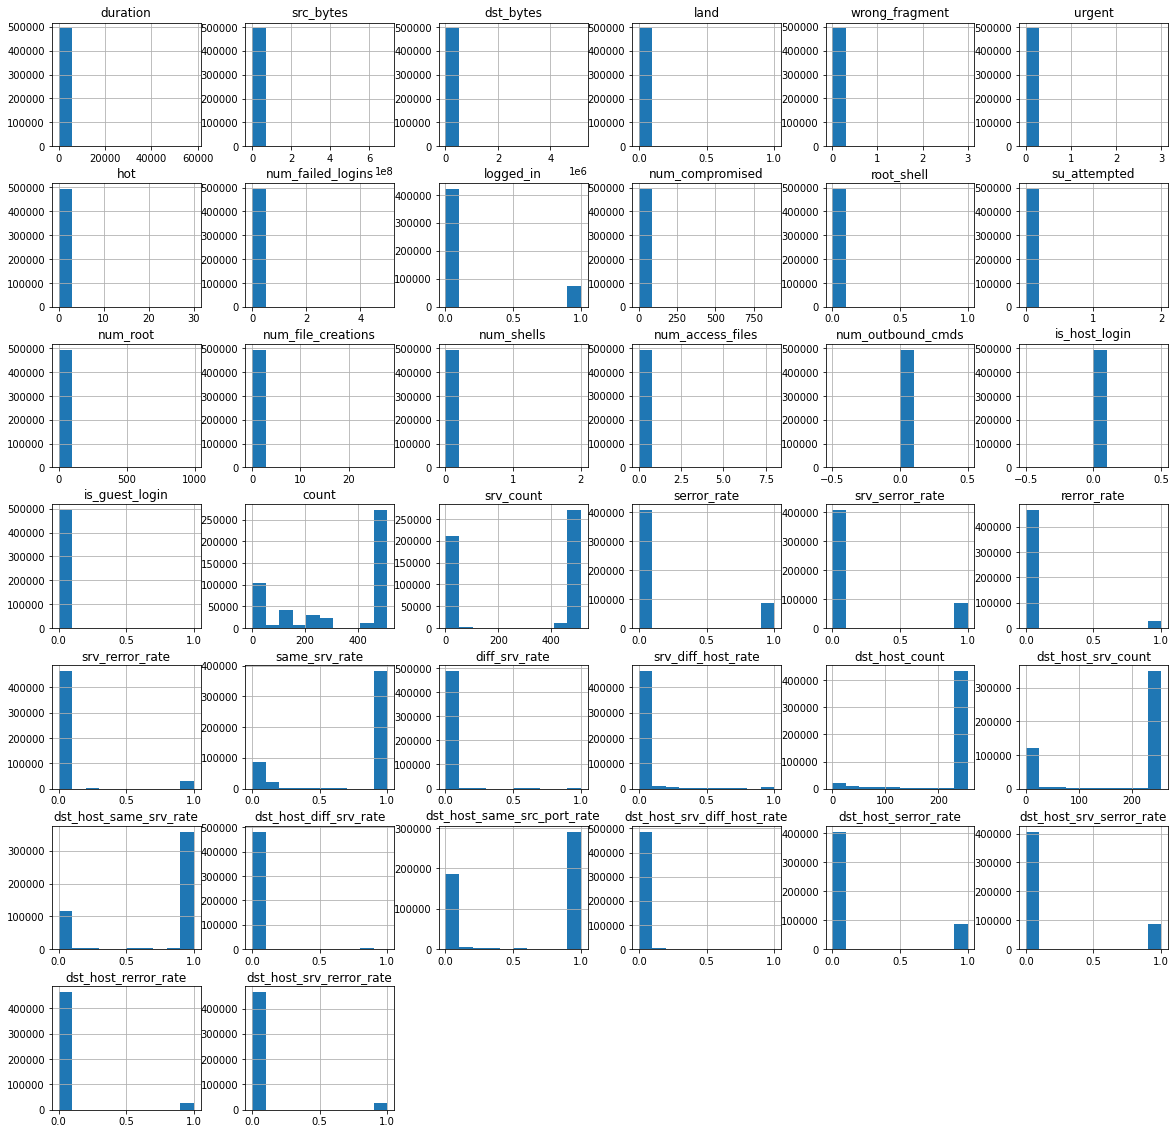

In [ ]:
df.hist(figsize=(20,20))
plt.show()

<ipython-input-27-9e0610ca3246>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')# drop columns with NaN


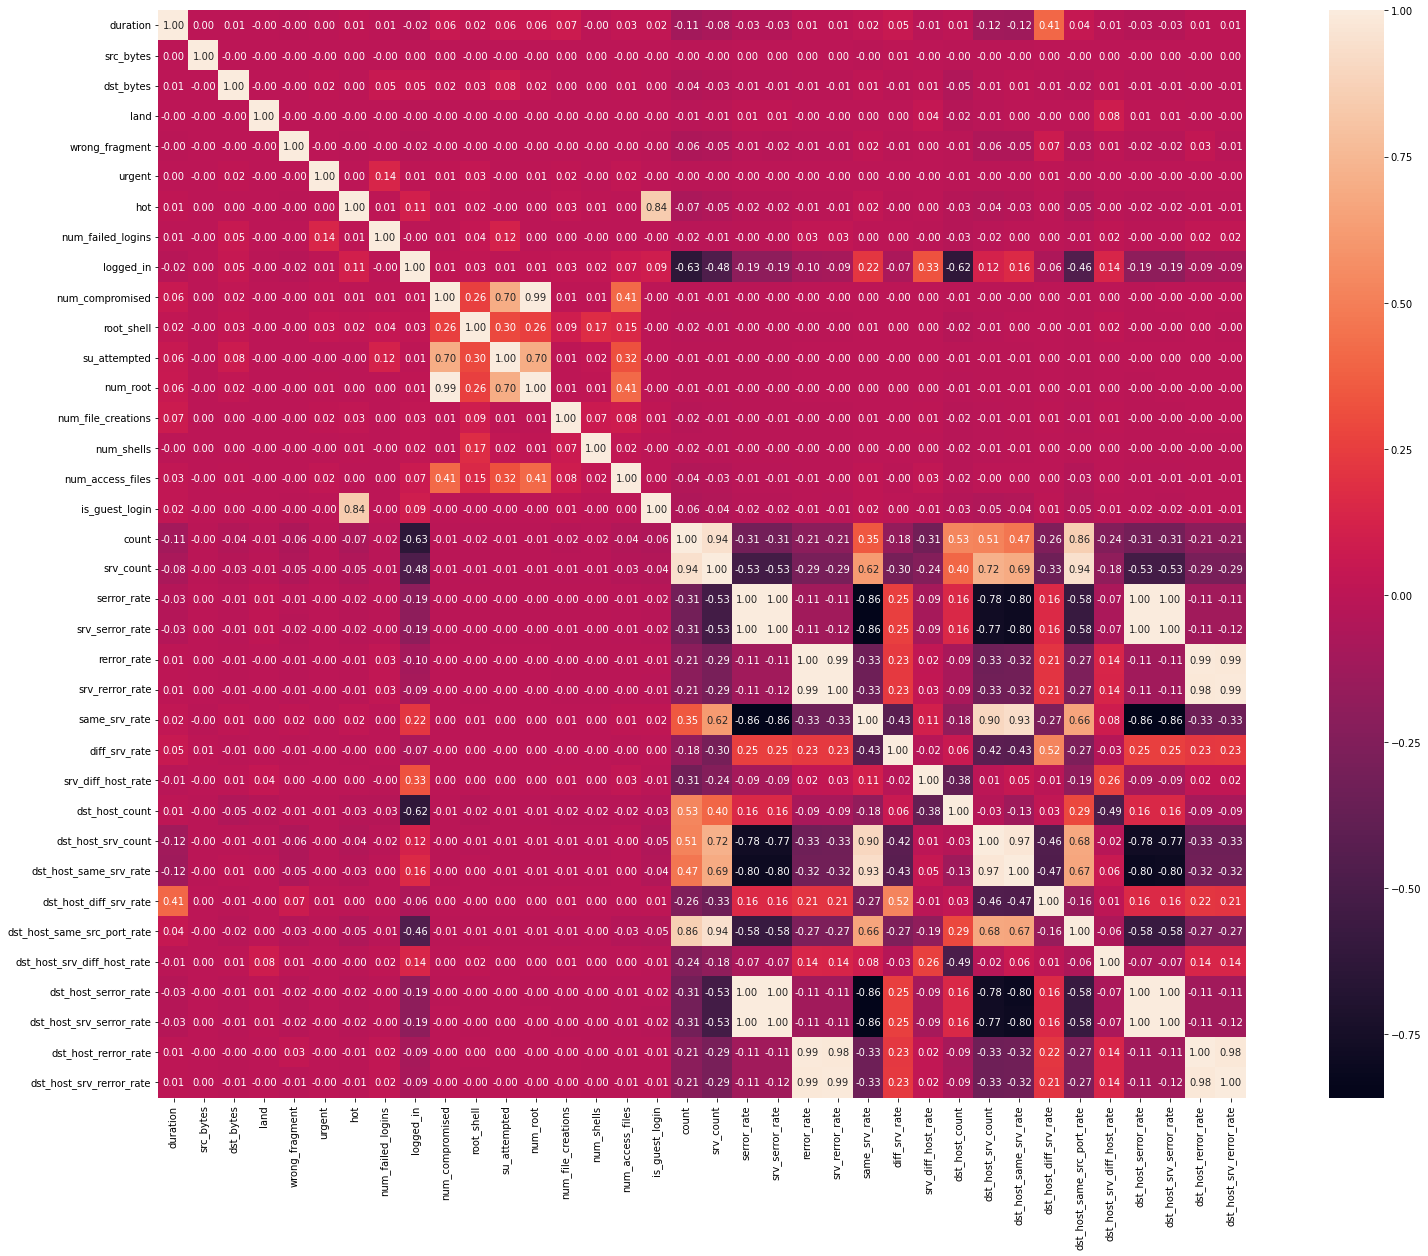

In [ ]:
#Data Correlation – Find the highly correlated variables 
#using heatmap and ignore them for analysis.
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(30,20))

sns.heatmap(corr, square=True, annot=True, fmt='.2f', linecolor='white')

plt.show()

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)



In [ ]:
#Remove irrelevant features such as ‘service’ before modelling
#Remove target as its the same as Attack Type
df.drop('service', axis = 1,inplace= True)
df.drop('target', axis = 1, inplace=True)

In [ ]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,Attack Type
0,0,tcp,SF,181,5450,0,0,0,0,0,...,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal
1,0,tcp,SF,239,486,0,0,0,0,0,...,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal
2,0,tcp,SF,235,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal
3,0,tcp,SF,219,1337,0,0,0,0,0,...,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal
4,0,tcp,SF,217,2032,0,0,0,0,0,...,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal


In [ ]:
df.shape

(494021, 31)

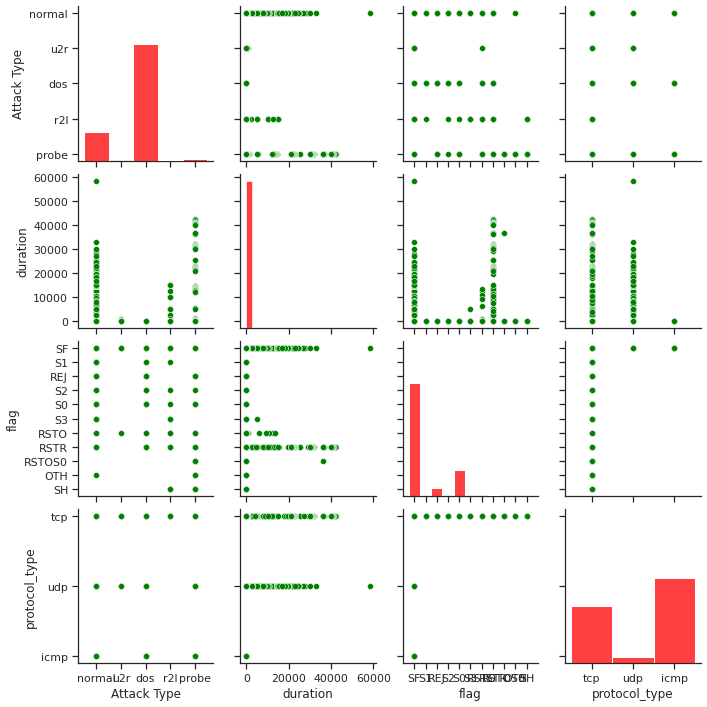

In [ ]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, diag_kws={'color':'red'}, plot_kws={'color':'green'} ,vars=['Attack Type','duration','flag','protocol_type'])
plt.show()

In [ ]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [ ]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [ ]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [ ]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [ ]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [ ]:
#attack_type feature mapping
amap = {'dos':0,'normal':1,'probe':2, 'r2l':3, 'u2r': 4}
df['Attack Type'] = df['Attack Type'].map(amap)

In [ ]:
#Assigning the columns to X and Y
#Standardizing the X
from sklearn.preprocessing import StandardScaler
X=df.drop(['Attack Type',], axis=1)
Y=df[['Attack Type']]
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
print(X)

[[-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -1.02207729
  -0.15862929]
 [-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -1.14673739
  -0.15862929]
 [-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -1.18829076
  -0.15862929]
 ...
 [-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -1.12596071
   1.02809369]
 [-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -1.16751407
   1.02809369]
 [-0.06779172  0.92575306 -0.49835724 ... -0.28286668 -0.89741718
   1.02809369]]


In [ ]:
from sklearn.model_selection import train_test_split

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


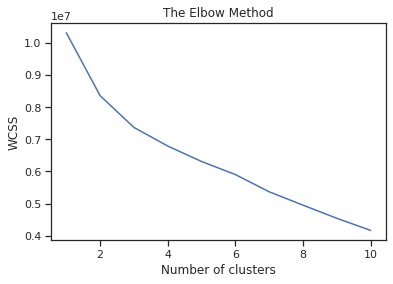

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
range_n_clusters = [1,2, 3, 4, 5, 6, 7]
Train_accuracy = []
for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(X_train)
   
    print( 'Number of Clusters =', n, "Performance on train data")
    Y_pred_train = kmeans.predict(X_train)
    accuracy = accuracy_score(Y_train,Y_pred_train)
    print("Accuracy: ", accuracy)
    Train_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    
    

Number of Clusters = 1 Performance on train data
Accuracy:  0.7926185973159634
Number of Clusters = 2 Performance on train data
Accuracy:  0.2244783893363626
Number of Clusters = 3 Performance on train data
Accuracy:  0.7564759482044991
Number of Clusters = 4 Performance on train data
Accuracy:  0.5851374949394853
Number of Clusters = 5 Performance on train data
Accuracy:  0.012861260324960573
Number of Clusters = 6 Performance on train data
Accuracy:  0.5751433560729198
Number of Clusters = 7 Performance on train data
Accuracy:  0.5837809748817199


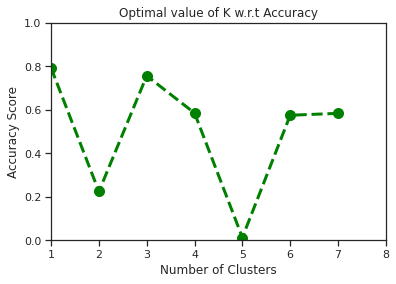

In [ ]:
plt.plot(range_n_clusters,Train_accuracy,color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor = 'green', markersize = 10)

# setting x and y axis range
plt.ylim(0,1)
plt.xlim(1,8)
# naming the x axis
plt.xlabel('Number of Clusters')
# naming the y axis
plt.ylabel('Accuracy Score')
plt.title('Optimal value of K w.r.t Accuracy')
plt.show()

In [ ]:
#Training model on optimal value of K
kmeans = KMeans(n_clusters=3, init= 'k-means++', random_state=42) 

kmeans.fit(X_train)
Y_predtrain= kmeans.predict(X_train)
ac = accuracy_score(Y_train,Y_predtrain)
print(ac)

0.7564759482044991


In [ ]:
#Making a prediction and getting the accuracy of the predicted labels
Y_predtest = kmeans.predict(X_test)
ac = accuracy_score(Y_test,Y_predtest)
print(ac)

0.756617002091678


In [ ]:
#checking the labels given by KMeans model
kmeans.labels_

array([2, 0, 0, ..., 0, 2, 2], dtype=int32)

In [ ]:
#Making a confusion matrix on K=3
cm = confusion_matrix(Y_test,Y_predtest)
print(cm)

[[92646  1104 35356     0     0]
 [   33 29814  2320     0     0]
 [    0   459   889     0     0]
 [    0   369    18     0     0]
 [    0    19     0     0     0]]


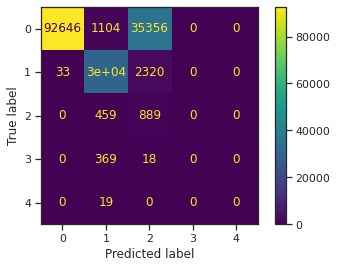

In [ ]:
#displaying a confusion Matrix on K=3
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
#importing classification report
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_predtest))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84    129106
           1       0.94      0.93      0.93     32167
           2       0.02      0.66      0.04      1348
           3       0.00      0.00      0.00       387
           4       0.00      0.00      0.00        19

    accuracy                           0.76    163027
   macro avg       0.39      0.46      0.36    163027
weighted avg       0.98      0.76      0.85    163027



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(kmeans, X_train, Y_train, cv = 5, scoring = 'accuracy')
print("cross-validation scores: {}".format(scores))
print("Average cross-validation score:{:.2f}".format(scores.mean()))

cross-validation scores: [0.58686687 0.58399674 0.75739815 0.75712624 0.75618599]
Average cross-validation score:0.69


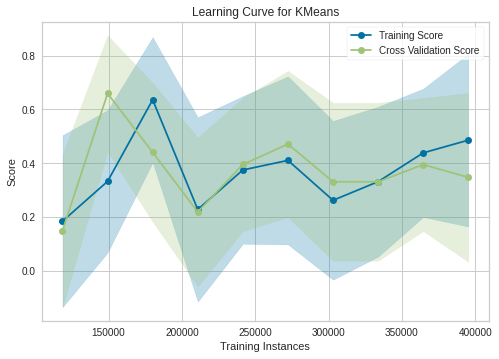

In [ ]:
#Learning curve
from yellowbrick.model_selection import LearningCurve
sizes = np.linspace(0.3, 1.0, 10)
visualizer = LearningCurve(
    kmeans, cv=5, scoring='f1_weighted', train_sizes=sizes, n_jobs=4
)

visualizer.fit(X, Y)        # Fit the data to the visualizer
visualizer.show() 

In [ ]:
#PCA for feature selection
from sklearn.decomposition import PCA
pca = PCA()
x = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.20159808, 0.09960521, 0.072401  , 0.05934531, 0.05030607,
       0.04885732, 0.04781171, 0.04479158, 0.0419612 , 0.03558699,
       0.0319083 , 0.03184669, 0.0292483 , 0.02764364, 0.02728273,
       0.02688728, 0.02508326, 0.02322315, 0.0220077 , 0.01221963,
       0.01091611, 0.00933839, 0.0070546 , 0.00522367, 0.00337444,
       0.00191268, 0.00096261, 0.0009537 , 0.00043579, 0.00021285])

In [ ]:
#Selecting attributes with variance higher than 45%
x = df[['duration','protocol_type','flag', 'src_bytes','dst_bytes','land','wrong_fragment','urgent']]
y=df[['Attack Type']]

In [ ]:
#checking the shape od independent variable x
x.shape

(494021, 8)

In [ ]:
#Standardize and split it into train and test set
sc = StandardScaler()
x = sc.fit_transform(x)

# Split test and train data 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(345814, 8) (148207, 8)
(345814, 1) (148207, 1)


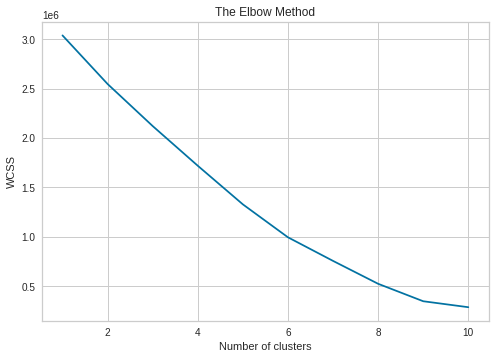

In [ ]:
#Find optimal number of K through the ELbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Find accuracy of the model against different number of K
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.cluster import KMeans
range_n_clusters = [1,2, 3, 4, 5, 6, 7,8,9,10]
Train_accuracy = []
for n in range_n_clusters:
    kmeans = KMeans(n_clusters = n, init = 'k-means++', random_state = 42)
    kmeans.fit(x_train)
   
    print( 'Number of Clusters =', n, "Performance on train data")
    y_pred_train = kmeans.predict(x_train)
    accuracy = accuracy_score(y_train,y_pred_train)
    print("Accuracy: ", accuracy)
    Train_accuracy.append(accuracy_score(y_train,y_pred_train))
    

Number of Clusters = 1 Performance on train data
Accuracy:  0.7925185215173475
Number of Clusters = 2 Performance on train data
Accuracy:  0.7629390365919252
Number of Clusters = 3 Performance on train data
Accuracy:  0.7629419283198482
Number of Clusters = 4 Performance on train data
Accuracy:  0.7629419283198482
Number of Clusters = 5 Performance on train data
Accuracy:  0.2264194046510552
Number of Clusters = 6 Performance on train data
Accuracy:  0.22447616348672986
Number of Clusters = 7 Performance on train data
Accuracy:  0.5687305892763161
Number of Clusters = 8 Performance on train data
Accuracy:  0.22447616348672986
Number of Clusters = 9 Performance on train data
Accuracy:  0.7499349361217302
Number of Clusters = 10 Performance on train data
Accuracy:  0.00682158617060038


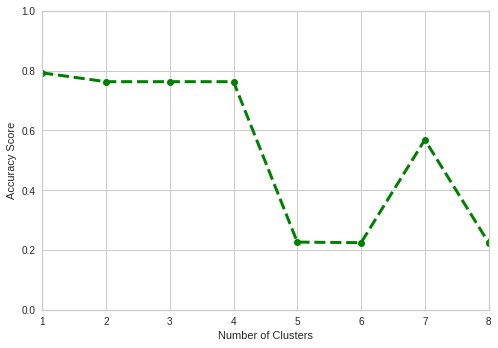

In [ ]:
#Plot the accuracy score against the value of K
plt.plot(range_n_clusters,Train_accuracy,color='green', linestyle='dashed', linewidth = 3,
         marker='o')

# setting x and y axis range
plt.ylim(0,1)
plt.xlim(1,8)
# naming the x axis
plt.xlabel('Number of Clusters')
# naming the y axis
plt.ylabel('Accuracy Score')
plt.show()

In [ ]:
#Fit the model on ptimal value of K
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

kmeans = KMeans(n_clusters=3, init= 'k-means++', random_state=42) 

kmeans.fit(x_train)
y_predtrain= kmeans.predict(x_train)
ac = accuracy_score(y_train,y_predtrain)
print(ac)

0.7629419283198482


In [ ]:
# Predict the result of the test set on the trained model
y_predtest = kmeans.predict(x_test)
ac = accuracy_score(y_test,y_predtest)
print(ac)

0.7638573076845223


In [ ]:
#Print the confusion matrix 
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train,y_predtrain)
print(cm)

[[196624  77440      0      0      0]
 [   875  67211      0      0      0]
 [   874   1977      1      0      0]
 [     0    777      0      0      0]
 [     0     35      0      0      0]]


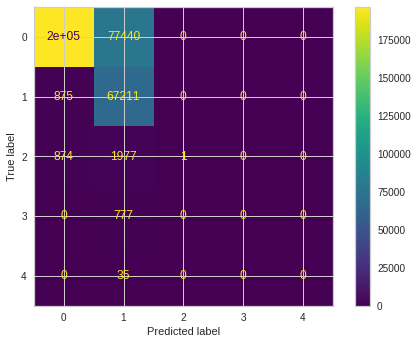

In [ ]:
#display the heatmap of confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
cm_display.plot()
plt.show()

In [ ]:
#Print the classification report to check performance of data
from sklearn.metrics import classification_report

print(classification_report(y_train, y_predtrain))

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.72      0.83    274064
           1       0.46      0.99      0.62     68086
           2       1.00      0.00      0.00      2852
           3       0.00      0.00      0.00       777
           4       0.00      0.00      0.00        35

    accuracy                           0.76    345814
   macro avg       0.49      0.34      0.29    345814
weighted avg       0.88      0.76      0.78    345814



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
